<a href="https://colab.research.google.com/github/alejandroMgno/analisi_store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import folium

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
tienda2.head()
tienda3.head()
tienda4.head()

Producto Categoría del Producto     Precio  Costo de envío  \
0         Lavavajillas      Electrodomésticos  1084800.0         56000.0   
1             Cama box                Muebles   473800.0         25400.0   
2  Balón de baloncesto   Deportes y diversión    23700.0             0.0   
3  Modelado predictivo                 Libros    57700.0          1300.0   
4          Auriculares           Electrónicos   138900.0          5600.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      11/11/2022    Rafael Acosta          Bogotá             4   
1      03/01/2020  Izabela de León          Cúcuta             5   
2      25/12/2022    Maria Alfonso        Medellín             5   
3      23/11/2021    Lucas Olivera        Medellín             3   
4      25/04/2022   Blanca Ramirez          Bogotá             4   

       Método de pago  Cantidad de cuotas      lat       lon  
0  Tarjeta de crédito                   3  4.60971 -74.08175  
1  Tarjeta de crédito                   2  7.89391 -72.50782  
2               Nequi                   1  6.25184 -75.56359  
3               Nequi                   1  6.25184 -75.56359  
4  Tarjeta de crédito                   7  4.60971 -74.08175

#1. Análisis de facturación



In [43]:

sumat1=tienda["Precio"].sum()
print(f' Ventas tienda 1: $ {tienda["Precio"].sum()}')
sumat2=tienda2["Precio"].sum()
print(f' Ventas tienda 2: $ {tienda2["Precio"].sum()}')
sumat3=tienda3["Precio"].sum()
print(f' Ventas tienda 3: $ {tienda3["Precio"].sum()}')
sumat4=tienda4["Precio"].sum()
print(f' Ventas tienda 4: $ {tienda4["Precio"].sum()}')

suma=[sumat1,sumat2,sumat3,sumat4]
nombres_tiendas=['Tienda 1','Tienda 2','Tienda 3','Tienda 4']

 Ventas tienda 1: $ 1150880400.0
 Ventas tienda 2: $ 1116343500.0
 Ventas tienda 3: $ 1098019600.0
 Ventas tienda 4: $ 1038375700.0


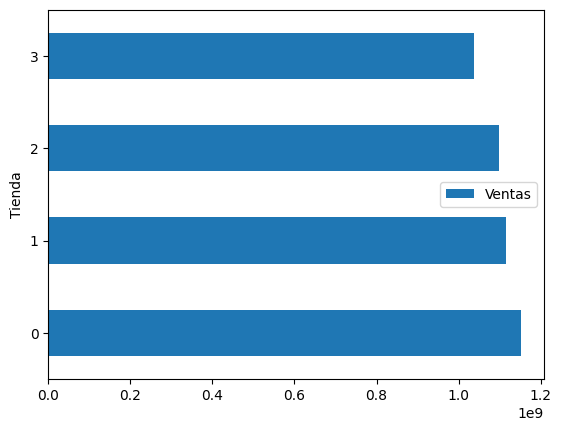

In [54]:
df_ventas = pd.DataFrame({
    "Tienda": nombres_tiendas,
    "Ventas": suma
})

ax=df_ventas.plot(x="Tienda", y="Ventas", kind="barh")
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.show()

# 2. Ventas por categoría

In [20]:
tabla = tienda.groupby("Categoría del Producto")["Precio"].sum()
tabla.name = "Tienda 1"

tabla2 = tienda2.groupby("Categoría del Producto")["Precio"].sum()
tabla2.name = "Tienda 2"

tabla3 = tienda3.groupby("Categoría del Producto")["Precio"].sum()
tabla3.name = "Tienda 3"

tabla4 = tienda4.groupby("Categoría del Producto")["Precio"].sum()
tabla4.name = "Tienda 4"

# Combinar todas las tablas por el índice (Categoría del Producto)
tabla_final = pd.concat([tabla, tabla2, tabla3, tabla4], axis=1)
tabla_final


Tienda 1     Tienda 2     Tienda 3     Tienda 4
Categoría del Producto                                                     
Artículos para el hogar   12698400.0   14746900.0   15060000.0   15074500.0
Deportes y diversión      39290000.0   34744500.0   35593100.0   33350100.0
Electrodomésticos        363685200.0  348567800.0  329237900.0  283260200.0
Electrónicos             429493500.0  410831100.0  410775800.0  409476100.0
Instrumentos musicales    91299000.0  104990300.0   77380900.0   75102400.0
Juguetes                  17995700.0   15945400.0   19401100.0   20262200.0
Libros                     8784900.0   10091200.0    9498700.0    9321300.0
Muebles                  187633700.0  176426300.0  201072100.0  192528900.0

# 3. Calificación promedio de la tienda


In [27]:
promedio_t1 = tienda["Calificación"].mean()
promedio_t2 = tienda2["Calificación"].mean()
promedio_t3 = tienda3["Calificación"].mean()
promedio_t4 = tienda4["Calificación"].mean()

print(f"Promedio Tienda 1: {promedio_t1:.2f}")
print(f"Promedio Tienda 2: {promedio_t2:.2f}")
print(f"Promedio Tienda 3: {promedio_t3:.2f}")
print(f"Promedio Tienda 4: {promedio_t4:.2f}")


Promedio Tienda 1: 3.98
Promedio Tienda 2: 4.04
Promedio Tienda 3: 4.05
Promedio Tienda 4: 4.00


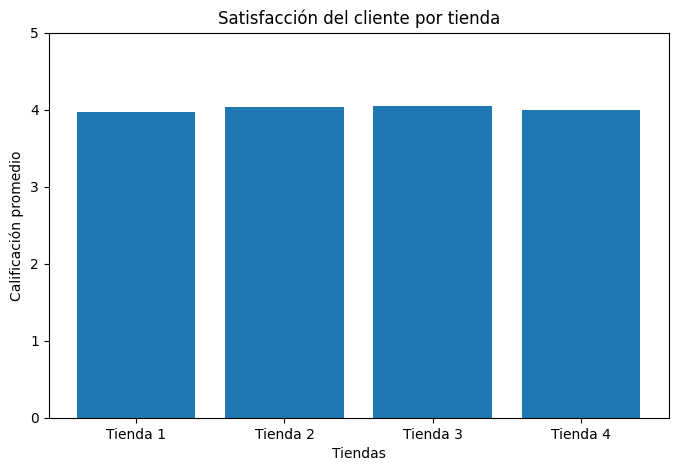

In [36]:
# Listas de promedios y nombres de tiendas
promedios = [promedio_t1, promedio_t2, promedio_t3, promedio_t4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Crear gráfico de barras
plt.figure(figsize=(8,5))
plt.subplot(1, 1, 1)
plt.bar(nombres_tiendas, promedios)
plt.xlabel("Tiendas")
plt.ylim(0, 5)  # asumiendo calificación de 0 a 5
plt.ylabel("Calificación promedio")
plt.title("Satisfacción del cliente por tienda")
plt.show()

# 4. Productos más y menos vendidos

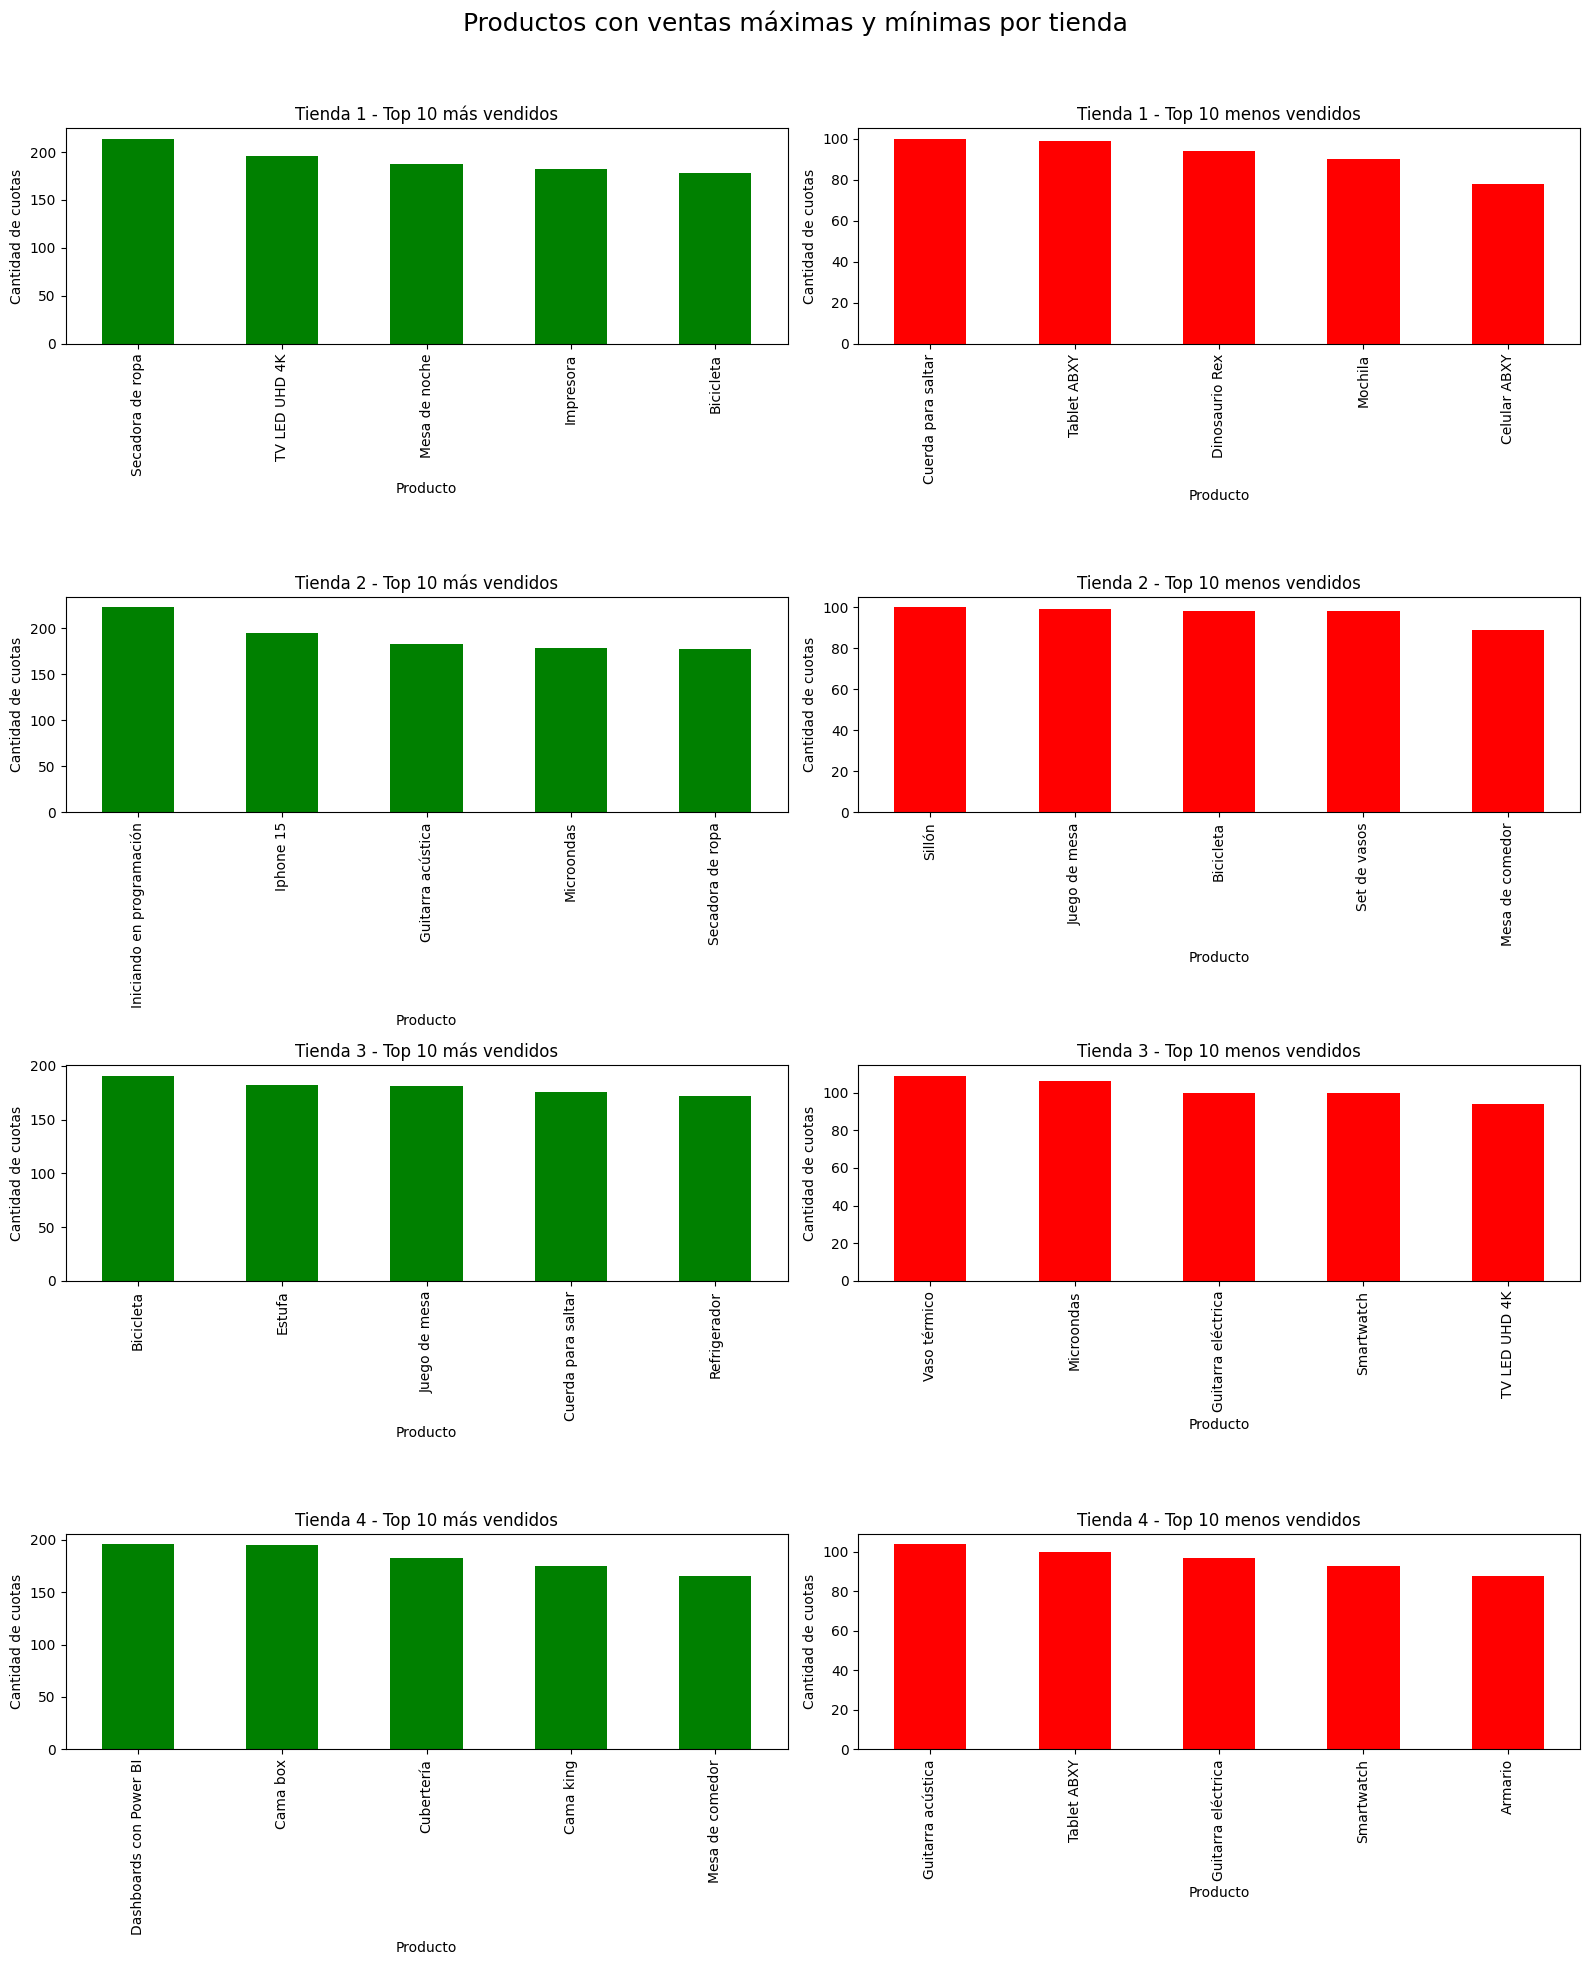

In [65]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Crear figura con 4 filas x 2 columnas
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle("Productos con ventas máximas y mínimas por tienda", fontsize=18)

for i, df in enumerate(tiendas):
    # Agrupar por producto y sumar "Cantidad de cuotas"
    ventas_producto = df.groupby("Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

    # Top 10 productos más vendidos
    top10 = ventas_producto.head(5)
    top10.plot(kind='bar', color='green', ax=axes[i,0], legend=False)
    axes[i,0].set_title(f"{nombres_tiendas[i]} - Top 10 más vendidos")
    axes[i,0].set_ylabel("Cantidad de cuotas")

    # Top 10 productos menos vendidos
    bottom10 = ventas_producto.tail(5)
    bottom10.plot(kind='bar', color='red', ax=axes[i,1], legend=False)
    axes[i,1].set_title(f"{nombres_tiendas[i]} - Top 10 menos vendidos")
    axes[i,1].set_ylabel("Cantidad de cuotas")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 5. Envío promedio por tienda

In [66]:
# Promedio costo de envío por tienda
prom_envio_t1 = tienda["Costo de envío"].mean()
prom_envio_t2 = tienda2["Costo de envío"].mean()
prom_envio_t3 = tienda3["Costo de envío"].mean()
prom_envio_t4 = tienda4["Costo de envío"].mean()

print(f"Costo de envío promedio Tienda 1: ${prom_envio_t1:.2f}")
print(f"Costo de envío promedio Tienda 2: ${prom_envio_t2:.2f}")
print(f"Costo de envío promedio Tienda 3: ${prom_envio_t3:.2f}")
print(f"Costo de envío promedio Tienda 4: ${prom_envio_t4:.2f}")


Costo de envío promedio Tienda 1: $26018.61
Costo de envío promedio Tienda 2: $25216.24
Costo de envío promedio Tienda 3: $24805.68
Costo de envío promedio Tienda 4: $23459.46


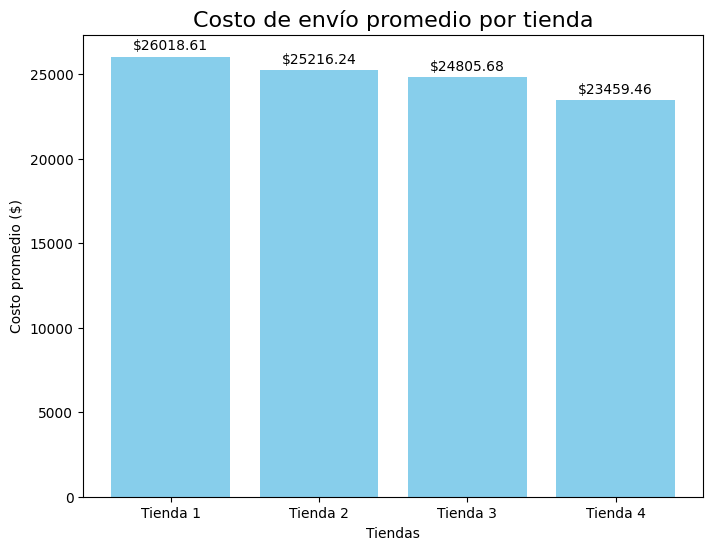

In [67]:
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios_envio = [prom_envio_t1, prom_envio_t2, prom_envio_t3, prom_envio_t4]

# Gráfico
plt.figure(figsize=(8,6))
bars = plt.bar(nombres_tiendas, promedios_envio, color='skyblue')
plt.title("Costo de envío promedio por tienda", fontsize=16)
plt.ylabel("Costo promedio ($)")
plt.xlabel("Tiendas")

# Mostrar valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, f"${yval:.2f}", ha='center', va='bottom')

plt.show()

In [76]:
m = folium.Map(location=[4.6, -74.1], zoom_start=6)

for idx, row in tienda.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=row['Cantidad de cuotas']/2,
        popup=f"{row['Producto']}: ${row['Precio']}",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

m  # Interactivo en Jupyter/Colab
